<a href="https://colab.research.google.com/github/kkkkaty/MOAD/blob/main/%D0%BC%D0%BE%D0%B0%D0%B41.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0.Описать задачу словами

Описание датасета: датасет представляет собой информацию о контенте платформы Netflix, содержащую 8807 записей о различных фильмах и сериалах. Каждая запись включает в себя 12 ключевых характеристик, которые описывают медиапродукт. Этот датасет представляет ценность для анализа контентной стратегии Netflix, построения рекомендательных систем, исследования рыночных трендов и создания моделей машинного обучения для классификации и прогнозирования популярности контента.

Описание задачи: эта работа представляет собой проект по анализу данных Netflix и построению моделей машинного обучения для классификации контента. Основной задачей является прогнозирование категорий контента Netflix на основе различных характеристик фильмов и сериалов.

1.Прочитать данные

In [674]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
from scipy.sparse import hstack
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MultiLabelBinarizer, StandardScaler


In [675]:
import kagglehub
import pandas as pd
import os

path = kagglehub.dataset_download("shivamb/netflix-shows")

file_path = path + "/netflix_titles.csv"
data_raw = pd.read_csv(file_path)

Using Colab cache for faster access to the 'netflix-shows' dataset.


In [676]:
data_raw

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [677]:
data_raw.shape

(8807, 12)

In [678]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


2. Разбить данные на обучающую и тестовую выборки

In [679]:
# для дальнейшего предсказания будем использовать только 10 самых популярных жанров
data_raw['primary_genre'] = data_raw['listed_in'].apply(lambda s: s.split(',')[0].strip())
top_genres_count = 10
genre_counts = data_raw['primary_genre'].value_counts()
common_genres = genre_counts.head(top_genres_count).index
data_filtered = data_raw[data_raw['primary_genre'].isin(common_genres)]

from sklearn.model_selection import train_test_split

X = data_filtered.drop(['primary_genre','listed_in', 'date_added', 'show_id'], axis=1)
y = data_filtered['primary_genre']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

N_train, N_test


(5454, 1819)

3. Визуализировать данные и вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.). Интерпретировать.

Основные статистики для release_year:
count    8807.000000
mean     2014.180198
std         8.819312
min      1925.000000
25%      2013.000000
50%      2017.000000
75%      2019.000000
max      2021.000000
Name: release_year, dtype: float64


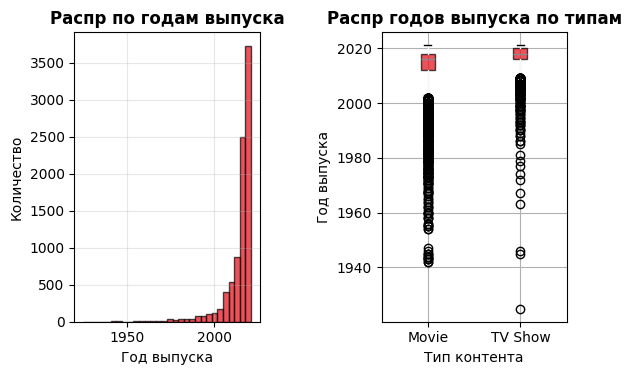

In [680]:
data = data_raw.copy()
print("Основные статистики для release_year:")
release_year_stats = data['release_year'].describe()
print(release_year_stats)

# Визуализация release_year
plt.subplot(1, 2, 1)
plt.hist(data['release_year'].dropna(), bins=30, color='#E50914', alpha=0.7, edgecolor='black')
plt.title('Распр по годам выпуска', fontsize=12, fontweight='bold')
plt.xlabel('Год выпуска')
plt.ylabel('Количество')
plt.grid(True, alpha=0.3)

# Боксплот для release_year по типам контента
plt.subplot(1, 2, 2)
data.boxplot(column='release_year', by='type', ax=plt.gca(), patch_artist=True,
            boxprops=dict(facecolor='#E50914', alpha=0.7))
plt.title('Распр годов выпуска по типам', fontsize=12, fontweight='bold')
plt.suptitle('')  # Убираем автоматический заголовок
plt.xlabel('Тип контента')
plt.ylabel('Год выпуска')

# Добавляем отступ между графиками
plt.tight_layout(pad=3.0)
plt.show()

Объем данных: 8807 единиц контента

Средний год выпуска: 2014.18

Стандартное отклонение: 8.82 года

Диапазон: с 1925 по 2021 год

Медиана: 2017 год

Наибольшее количество контента выпущено около 2019-2020 годов

Резкий рост производства начался примерно с 2000-х годов

До 1990-х годов выпускалось очень мало контента


Данные показывают, что платформа в основном содержит современный контент, выпущенный в последние 5-10 лет, что характерно для стриминговых сервисов.

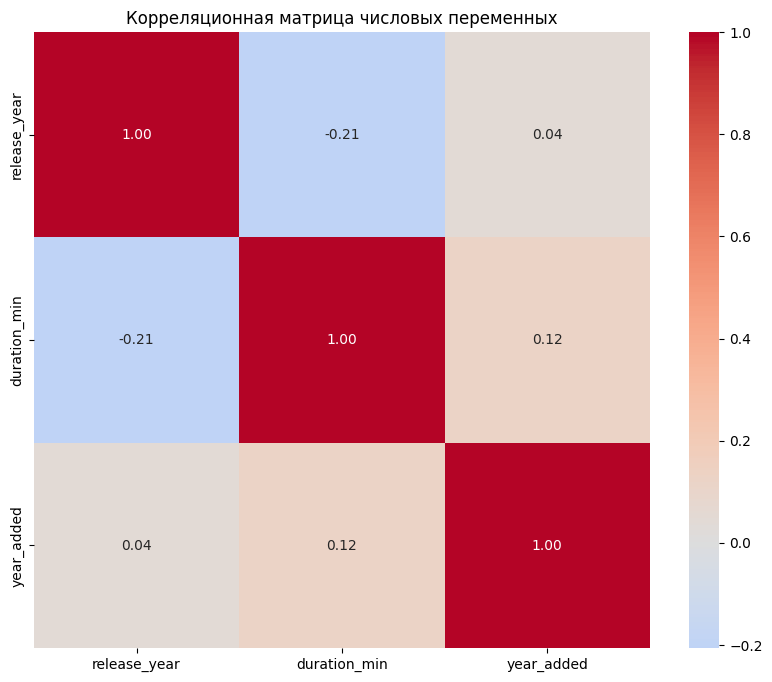

In [681]:
# Корреляционный анализ числовых переменных
movies = data_raw[data_raw['type'] == 'Movie'].copy()
movies['duration_min'] = movies['duration'].str.extract(r'(\d+)').astype(float)
data_raw['date_added'] = pd.to_datetime(data_raw['date_added'], errors='coerce')
data_raw['year_added'] = data_raw['date_added'].dt.year


# Создаем новый DataFrame для числовых переменных
numeric_data_raw = pd.DataFrame()
numeric_data_raw['release_year'] = data_raw['release_year']
numeric_data_raw['duration_min'] = movies['duration_min']
numeric_data_raw['year_added'] = data_raw['year_added']

# Удаляем пропущенные значения
numeric_data_raw = numeric_data_raw.dropna()

plt.figure(figsize=(10, 8))
correlation_matrix = numeric_data_raw.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f')
plt.title("Корреляционная матрица числовых переменных")
plt.show()


Более новые фильмы имеют небольшую тенденцию к меньшей продолжительности
В среднем современные фильмы немного короче старых

Продолжительность фильмов практически не зависит от года выпуска и других анализируемых факторов

Нет четкого тренда в изменении продолжительности фильмов со временем

Продолжительность - относительно стабильная характеристика, не подверженная сильным временным изменениям

Netflix придерживаются устоявшихся форматов по длительности


4. Обработать пропущенные значения

In [682]:
X_train.isnull().sum()

,0
type,0
title,0
director,1185
cast,437
country,480
release_year,0
rating,1
duration,0
description,0


In [683]:
cols_to_fill = ['director', 'cast', 'country', 'rating', 'duration']
for col in cols_to_fill:
    X_train[col] = X_train[col].fillna('unknown')
    X_test[col] = X_test[col].fillna('unknown')

print("\nПосле обработки пропусков:")
X_train.isnull().sum()


После обработки пропусков:


,0
type,0
title,0
director,0
cast,0
country,0
release_year,0
rating,0
duration,0
description,0


5. Обработать категориальные признаки

In [684]:
X_train['type'] = X_train['type'].astype('category')
X_train['rating'] = X_train['rating'].astype('category')
X_test['type'] = X_test['type'].astype('category')
X_test['rating'] = X_test['rating'].astype('category')

In [685]:
from sklearn.preprocessing import OneHotEncoder, MultiLabelBinarizer
enc = OneHotEncoder(drop='if_binary', sparse_output=False)
enc.fit(X_train[['type','rating']])

OneHotEncoder(drop='if_binary', sparse_output=False)

In [686]:
dummies = pd.DataFrame(enc.transform(X_train[['type', 'rating']]),
                       columns=enc.get_feature_names_out(), index=X_train.index)
countries_split = X_train['country'].str.split(',').apply(
    lambda x: [item.strip() for item in x] if isinstance(x, list) else []
)
mlb = MultiLabelBinarizer()
country_encoded = mlb.fit_transform(countries_split)
country_df = pd.DataFrame(country_encoded,
                         columns=mlb.classes_,
                         index=X_train.index)
country_df = country_df.add_prefix('country_')
dummies = pd.concat([dummies, country_df], axis=1)
dummies.head()


,type_TV Show,rating_G,rating_NC-17,rating_NR,rating_PG,rating_PG-13,rating_R,rating_TV-14,rating_TV-G,rating_TV-MA,...,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Vatican City,country_Venezuela,country_Vietnam,country_West Germany,country_Zimbabwe,country_unknown
7890,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
7456,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
94,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,1,1,0,0,0,0,0,0,0
1671,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0


In [687]:
X_train = pd.concat((X_train, dummies), axis=1).drop(['type', 'rating', 'country'], axis=1)

In [688]:
X_train.head()

,title,director,cast,release_year,duration,description,type_TV Show,rating_G,rating_NC-17,rating_NR,...,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Vatican City,country_Venezuela,country_Vietnam,country_West Germany,country_Zimbabwe,country_unknown
7890,Room for Rent,Matthew Atkinson,"Brett Gelman, Mark Little, Carla Gallo, Stephn...",2017,89 min,"To save his parents’ home, a lottery-squanderi...",0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7456,Milk,Gus Van Sant,"Sean Penn, Emile Hirsch, Josh Brolin, Diego Lu...",2008,128 min,Sean Penn stars in this biopic about Harvey Mi...,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
735,Sarbath,Prabhakaran,"Kathir, Soori, Rahasya Gorak, Ashvatt",2021,113 min,When a city man returns to his native village ...,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
94,Show Dogs,Raja Gosnell,"Will Arnett, Ludacris, Natasha Lyonne, Stanley...",2018,90 min,A rough and tough police dog must go undercove...,0.0,0.0,0.0,0.0,...,0,1,1,0,0,0,0,0,0,0
1671,The App That Stole Christmas,Monica Floyd,"Jackie Long, Diane Marie Howard, Jaylin Hall, ...",2020,64 min,A tech entrepreneur's Christmas shopping app i...,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0


6. Провести нормализацию.
Standardization (Z-score Normalization)

In [689]:
features = ['release_year']

# Масштабируем чтобы все признаки были в одном масштабе
data_raw_processed = data_raw.copy()
scaler = StandardScaler()
data_raw_scaled = data_raw_processed.copy()
data_raw_scaled[features] = scaler.fit_transform(data_raw_processed[features])

print("До нормализации (первые 10 строк):")
print(data_raw_processed[features].head(10))
print("\nПосле нормализации (первые 10 строк):")
print(data_raw_scaled[features].head(10))

До нормализации (первые 10 строк):
   release_year
0          2020
1          2021
2          2021
3          2021
4          2021
5          2021
6          2021
7          1993
8          2021
9          2021

После нормализации (первые 10 строк):
   release_year
0      0.659930
1      0.773324
2      0.773324
3      0.773324
4      0.773324
5      0.773324
6      0.773324
7     -2.401707
8      0.773324
9      0.773324


7-8. Метод RandomForest. Вычислить ошибки на обучающей и тестовой выборках. Напечатать матрицы рассогласования. Прокомментировать.

Random Forest отлично работает со смешанными типами данных без необходимости сложного масштабирования. Также хорошо работает со сложными взаимосвями между признаками.

В данных Netflix присутствуют: пропущенные значения; разнородные форматы данных; "шумные" текстовые описания. RF отлично с этим справляется

In [690]:
dummies = pd.DataFrame(enc.transform(X_test[['type', 'rating']]),
                       columns=enc.get_feature_names_out(), index=X_test.index)

test_countries_split = X_test['country'].str.split(',').apply(
    lambda x: [item.strip() for item in x] if isinstance(x, list) else []
)
test_country_encoded = mlb.transform(test_countries_split)
test_country_df = pd.DataFrame(test_country_encoded,
                              columns=mlb.classes_,
                              index=X_test.index)
test_country_df = test_country_df.add_prefix('country_')

X_test = pd.concat((X_test, dummies), axis=1).drop(['type', 'rating', 'country'], axis=1)

X_train['combined_text'] = (
    X_train['description'].fillna('') + ' ' +
    X_train['title'].fillna('') + ' ' +
    X_train['director'].fillna('') + ' ' +
    X_train['cast'].fillna('') + ' ' +
    X_train['duration'].fillna('')
)

X_test['combined_text'] = (
    X_test['description'].fillna('') + ' ' +
    X_test['title'].fillna('') + ' ' +
    X_test['director'].fillna('') + ' ' +
    X_test['cast'].fillna('') + ' ' +
    X_test['duration'].fillna('')
)


tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_text = tfidf.fit_transform(X_train['combined_text'])
X_test_text = tfidf.transform(X_test['combined_text'])

svd = TruncatedSVD(n_components=150, random_state=42)
X_train_svd = svd.fit_transform(X_train_text)
X_test_svd = svd.transform(X_test_text)

text_columns_to_drop = ['description', 'title', 'director', 'cast', 'duration', 'combined_text']
X_train = X_train.drop([col for col in text_columns_to_drop if col in X_train.columns], axis=1)
X_test = X_test.drop([col for col in text_columns_to_drop if col in X_test.columns], axis=1)

scaler = StandardScaler()
year_train = scaler.fit_transform(X_train[['release_year']])
year_test = scaler.transform(X_test[['release_year']])

X_train_full = np.hstack([X_train_svd, X_train.values, year_train])
X_test_full = np.hstack([X_test_svd, X_test.values, year_test])
if isinstance(X_train_full, np.ndarray):
    X_train_full = pd.DataFrame(X_train_full)
if isinstance(X_test_full, np.ndarray):
    X_test_full = pd.DataFrame(X_test_full)


rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    class_weight='balanced',
    n_jobs=-1,
    random_state=42
)
common_cols = X_train_full.columns.intersection(X_test_full.columns)
X_train_full = X_train_full[common_cols]
X_test_full = X_test_full[common_cols]

print("Количество общих признаков:", len(common_cols))

rf.fit(X_train_full, y_train)
# Тестовые предсказания
y_pred = rf.predict(X_test_full)

# Тренировочные предсказания
y_train_pred = rf.predict(X_train_full)

print("Обучающая выборка")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("F1 (macro):", f1_score(y_train, y_train_pred, average='macro'))

print("\nТестовая выборка")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 (macro):", f1_score(y_test, y_pred, average='macro'))

print("\nClassification report:\n")

print(classification_report(y_test, y_pred, zero_division=0))


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:909: UserWarning: unknown class(es) ['Albania', 'Azerbaijan', 'East Germany', 'Kazakhstan', 'Latvia', 'Namibia', 'Palestine', 'Samoa'] will be ignored
  warnings.warn(


Количество общих признаков: 168
Обучающая выборка
Accuracy: 1.0
F1 (macro): 1.0

Тестовая выборка
Accuracy: 0.6520065970313359
F1 (macro): 0.6534714016830165

Classification report:

                          precision    recall  f1-score   support

      Action & Adventure       0.56      0.46      0.51       201
Children & Family Movies       0.81      0.81      0.81       156
                Comedies       0.51      0.33      0.40       289
          Crime TV Shows       0.94      0.55      0.70       112
           Documentaries       0.86      0.79      0.82       224
                  Dramas       0.47      0.73      0.57       399
           Horror Movies       0.83      0.07      0.13        71
  International TV Shows       0.75      0.97      0.85       189
                Kids' TV       0.94      0.92      0.93        90
         Stand-Up Comedy       0.83      0.81      0.82        88

                accuracy                           0.65      1819
               macro av

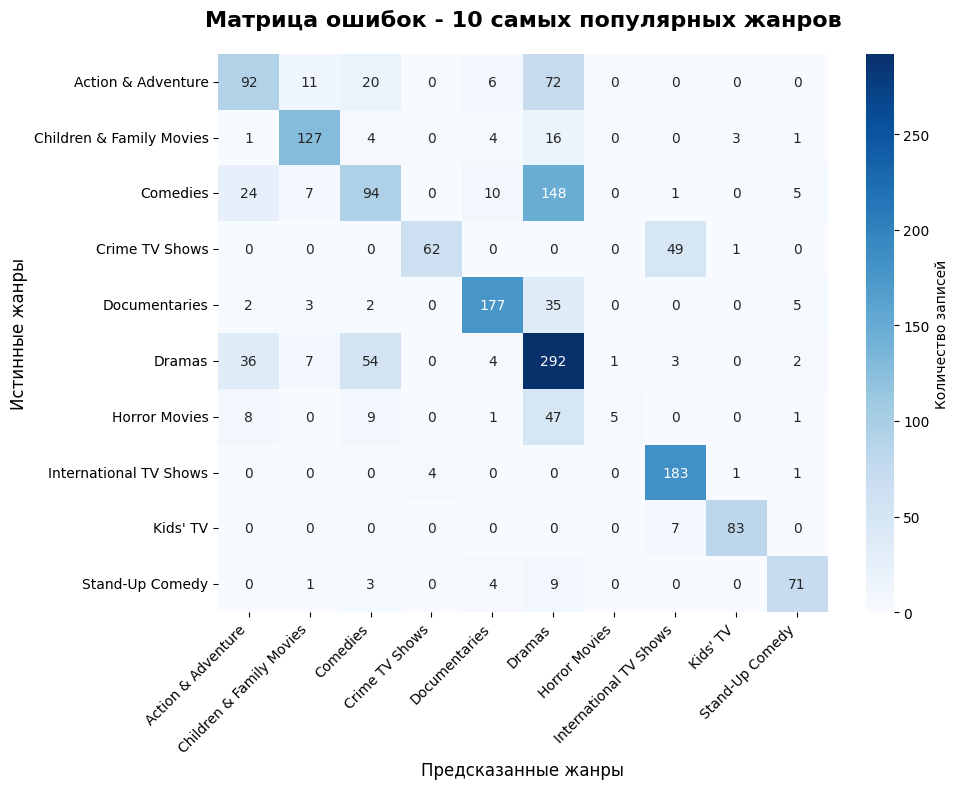

In [691]:
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=rf.classes_,
            yticklabels=rf.classes_,
            cbar_kws={'label': 'Количество записей'})

plt.title('Матрица ошибок - 10 самых популярных жанров', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Предсказанные жанры', fontsize=12)
plt.ylabel('Истинные жанры', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

9. Сделать общие выводы

Модель работает, но неидеально. Она хорошо справляется с "чистыми", хорошо отделимыми жанрами (международные сериалы, детские ТВ-шоу), но испытывает трудности с жанрами, которые часто смешиваются в реальности (Драмы, Комедии, Экшн).

Основная задача для улучшения - научиться лучше различать драмы от комедий и экшена. Вероятно, используемых признаков недостаточно для проведения четкой границы.